In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data_tms.csv', sep=';')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId - id пассажира
Survived - Выживаемость
Pclass - Класс обслуживания пассажира
Name - Имя
Sex - Пол
Age - Возраст
SibSp - Количество братьев, сестер или супругов на борту
Parch - Количество родителей или детей на борту
Ticket - номер билета
Fare - Стоимость билета
Cabin - Кабина
Embarked - Порт посадки на корабль

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/var/folders/jz/08_61t5j3l709y2kg70phbq40000gn/T/ipykernel_1456/3787586473.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [6]:
df = df.dropna(subset=['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


<Axes: >

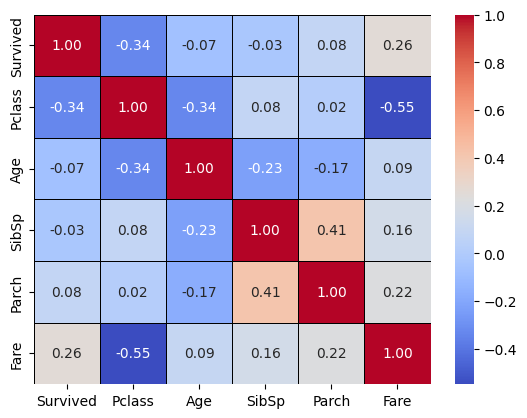

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns.drop(['PassengerId'])
sns.heatmap(data=df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.7, linecolor='black')

In [8]:
df['Status'] = df['Name'].str.split(', ').str[1].str.split(' ').str[0]
df

/var/folders/jz/08_61t5j3l709y2kg70phbq40000gn/T/ipykernel_1456/1815063257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] = df['Name'].str.split(', ').str[1].str.split(' ').str[0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


In [9]:
df['Status'].value_counts()
#TODO add регулярное выражение для статуса(через НС)

Status
Mr.          517
Miss.        181
Mrs.         124
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [10]:
df[df['Status'] == 'the']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,the


<Axes: xlabel='Age', ylabel='Count'>

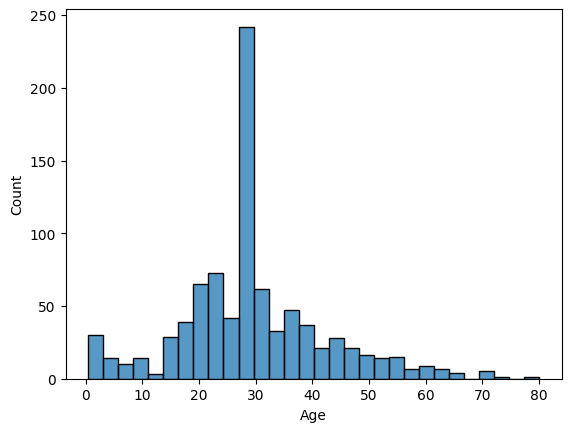

In [11]:
sns.histplot(df['Age'])

In [12]:
bins = [0, 4, 12, 18, 25, 60, 100] 
labels = ['МладенецТодлер', 'Ребенок', 'Подросток', 'Молодой', 'Взрослый', 'Пожилой']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df

/var/folders/jz/08_61t5j3l709y2kg70phbq40000gn/T/ipykernel_1456/450661675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Молодой
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Взрослый
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Взрослый
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Взрослый
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,Взрослый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.,Взрослый
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,Молодой
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss.,Взрослый
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,Взрослый


<Axes: xlabel='AgeGroup', ylabel='Count'>

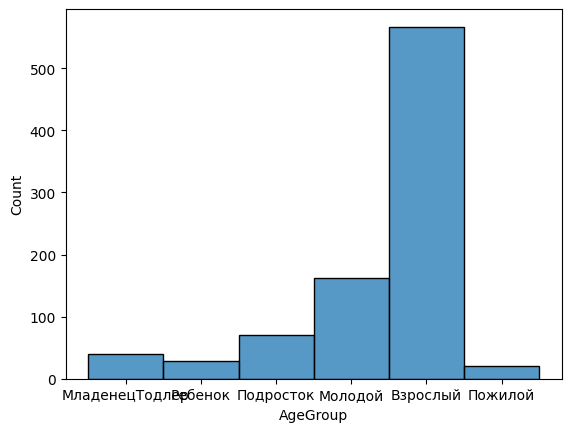

In [13]:
sns.histplot(df['AgeGroup'])

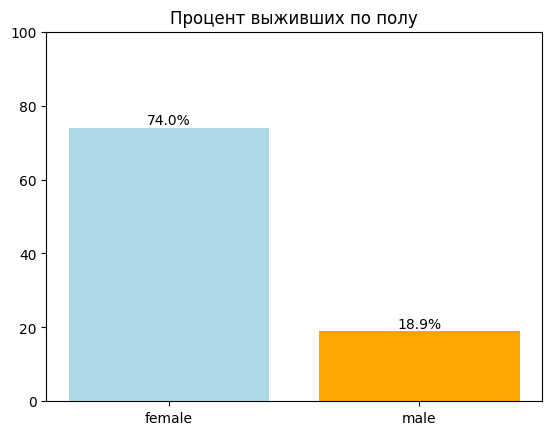

In [31]:
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean() * 100
bars = plt.bar(survival_rate_by_sex.index, survival_rate_by_sex.values, color=['lightblue', 'orange'])

plt.title('Процент выживших по полу')
plt.ylim(0, 100)

for i, (_, rate) in enumerate(survival_rate_by_sex.items()):
    plt.text(i, rate, f'{rate:.1f}%', ha='center', va='bottom')

In [14]:
probability = {}

In [15]:
df.groupby(['Sex'])['Survived'].size()

Sex
female    312
male      577
Name: Survived, dtype: int64

In [16]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [17]:
probability['Sex'] = df.groupby(['Sex'])['Survived'].mean().to_dict()

In [18]:
probability['Sex']['male']

0.18890814558058924

In [19]:
probability['AgeGroup'] = df.groupby(['AgeGroup'])['Survived'].mean().to_dict()

/var/folders/jz/08_61t5j3l709y2kg70phbq40000gn/T/ipykernel_1456/928369093.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probability['AgeGroup'] = df.groupby(['AgeGroup'])['Survived'].mean().to_dict()


In [20]:
probability['Pclass'] = df.groupby(['Pclass'])['Survived'].mean().to_dict()

In [21]:
probability['Status'] = df.groupby(['Status'])['Survived'].mean().to_dict()

In [22]:
probability['SibSp'] = df.groupby(['SibSp'])['Survived'].mean().to_dict()

In [23]:
probability['Parch'] = df.groupby(['Parch'])['Survived'].mean().to_dict()

In [24]:
probability

{'Sex': {'female': 0.7403846153846154, 'male': 0.18890814558058924},
 'AgeGroup': {'МладенецТодлер': 0.675,
  'Ребенок': 0.4482758620689655,
  'Подросток': 0.42857142857142855,
  'Молодой': 0.3333333333333333,
  'Взрослый': 0.37389770723104054,
  'Пожилой': 0.19047619047619047},
 'Pclass': {1: 0.6261682242990654,
  2: 0.47282608695652173,
  3: 0.24236252545824846},
 'Status': {'Capt.': 0.0,
  'Col.': 0.5,
  'Don.': 0.0,
  'Dr.': 0.42857142857142855,
  'Jonkheer.': 0.0,
  'Lady.': 1.0,
  'Major.': 0.5,
  'Master.': 0.575,
  'Miss.': 0.6961325966850829,
  'Mlle.': 1.0,
  'Mme.': 1.0,
  'Mr.': 0.15667311411992263,
  'Mrs.': 0.7903225806451613,
  'Ms.': 1.0,
  'Rev.': 0.0,
  'Sir.': 1.0,
  'the': 1.0},
 'SibSp': {0: 0.3432343234323432,
  1: 0.5358851674641149,
  2: 0.4642857142857143,
  3: 0.25,
  4: 0.16666666666666666,
  5: 0.0,
  8: 0.0},
 'Parch': {0: 0.34171597633136097,
  1: 0.5508474576271186,
  2: 0.5,
  3: 0.6,
  4: 0.0,
  5: 0.2,
  6: 0.0}}

In [25]:
def calculate_prob(probab, idpassanger):
    passanger = df.iloc[idpassanger].to_dict()
    #probab['Sex'][passanger['Sex']]
    probab_list = []

    for i in probab:
        probab_list.append(probab[i][passanger[i]])
    return np.mean(probab_list)

In [26]:
calculate_prob(probability, 5)

np.float64(0.27446529869225084)

In [27]:
probab_list = []

for i in range(len(df)):
    probab_list.append(calculate_prob(probability, i))

    

In [28]:
np.mean(probab_list)

np.float64(0.38245219347581555)

In [29]:
for i in probability:
    print(i)

Sex
AgeGroup
Pclass
Status
SibSp
Parch


In [30]:
df.iloc[115].to_dict()

{'PassengerId': 117,
 'Survived': 0,
 'Pclass': 3,
 'Name': 'Connors, Mr. Patrick',
 'Sex': 'male',
 'Age': 70.5,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': '370369',
 'Fare': 7.75,
 'Cabin': nan,
 'Embarked': 'Q',
 'Status': 'Mr.',
 'AgeGroup': 'Пожилой'}